<div style="background-color: #f8f9fa; padding: 20px;">
    <h1 style="color: #007bff; font-size: 32px; margin-bottom: 10px;">Natural Language Processing (NLP) Project</h1>
    <div style="color: #495057; font-size: 14px; margin-bottom: 5px;">[Problem Statement - Support Ticket Categorization] </div> </Br>
    <div style="color: #495057; font-size: 14px; margin-bottom: 5px;">by</div>
    <div style="color: #343a40; font-size: 20px; margin-bottom: 15px;">Prashant Patil</div>
    <div style="color: #6c757d; font-size: 14px;">AIML Online October 2023-A Batch</div>    
    <div style="color: #6c757d; font-size: 14px;">25 Aug 2024</div>
</div>

# Table of Contents

* Business Context
* Install/download Llama libraries
* Load and analyze data
* Model building
  - Download & define LLM (Mistral) model
* Define common functions
  - To initialize model & generate response
    Another function to test the model with sample input
  - To extract text from Json output
  - To standardize ETA in days
* Task 1 : To predict categories for ticket
  - Define task based function to generate prompt based on inputs
  - Define task based prompt, test model for prompt
  - Execute model for dataset
  - Parse and normalize Json output
  - Structure output in dataframe
* Task 2 : To predict tags for ticket, category
  
* Task 3 : To predict priority and ETA for ticket, category, tags
  
* Task 4 : To generate Response for relevant ticket

* Model output analysis
  - Univariate analysis of category, priority, ETA, category-wise ETA

* Actionable insights & Recommendations
  - Listing insights based on tickets and all outputs obtained from model
  - Listing recommendations based on insights

* Additional : Generating 'Actionable insights & Recommendations' using prompt & Model (Experiment)

* Final summary : about using effective prompts


**Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.
As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.
While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.
One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - done in the modern day using Large Language Models and Generative AI.

**Objective**

Develop a Generative AI application using a Large Language Model to automate the classification and processing of support tickets. The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, and store the results in a structured DataFrame.

## Install & import libraries

###### Install llama for GPU & CPU

In [6]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 170.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 209.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 182.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 312.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == 

In [7]:
# Installation for CPU llama-cpp-python
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

###### Install & import models from huggingface hub

In [8]:
# For downloading the models from HF Hub
!pip install huggingface_hub==0.20.3 pandas==1.5.3 -q

In [9]:
# Function to download the model from the Hugging Face model hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

# Importing the json module
import json

# for loading and manipulating data
import pandas as pd

# for time computations
import time

###### Import other libraries and mount google drive

In [10]:
#Import google drive
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Data Overview


##### Load the dataset

In [11]:
#Load support ticket dataset from google drive
data = pd.read_csv("/content/drive/My Drive/Colab/NLP/Support_ticket_text_data_mid_term.csv")

##### Print the overview of the data (first few rows, shape, etc)

###### Checking the first 5 rows of the data

In [12]:
#First few rows of the data
print(data.head())


  support_tick_id                                support_ticket_text
0      ST2023-006  My internet connection has significantly slowe...
1      ST2023-007  Urgent help required! My laptop refuses to sta...
2      ST2023-008  I've accidentally deleted essential work docum...
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...
4      ST2023-010  My smartphone battery is draining rapidly, eve...


###### Checking the shape of the data

In [13]:
#Shape of the dataset provided
print('Data frame Shape: ', data.shape)

Data frame Shape:  (21, 2)


###### Checking the missing values in the data

In [14]:
#Checking for null values
print('missing values for each column: ')
print(data.isnull().sum())


missing values for each column: 
support_tick_id        0
support_ticket_text    0
dtype: int64


###### Checking duplicate values in the data

In [15]:
#Checking for duplicates
print('Number of Duplicates: ', data.duplicated().sum())


Number of Duplicates:  0


## Model building

##### Load the model from Hugging Face

In [16]:
#Declare variables for model location and file
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [17]:
#Download model from said location of Huggingface
model_path = hf_hub_download(
    repo_id = model_name_or_path,
    filename = model_basename
)

mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [18]:
#Define llama model for GPU
llm = Llama(
    model_path=model_path,
    n_ctx=1024, # Context window
)

# llm = Llama(
#     model_path=model_path,
#     n_ctx=1024, # Context window
#     n_cores=-2 # Number of CPU cores to use
# )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


##### Create a function to define the model parameters and generate a response

In [19]:
#Function to define model with parameters and to capture response/output from model.
#This function to be used in all the tasks for relevant inputs
def GenerateModelResponse(input_id_text, temperature=0.1, top_p=0.75, top_k=40, repeat_penalty=1.1, max_tokens=1024):
    try:
        # Generate model output
        input_id_text += " INST "
        model_output = llm(
            input_id_text,
            max_tokens=max_tokens,
            # stop=["Q:", "\n"],
            stop=[" INST "],
            temperature=temperature,
            echo=False,
            top_k=top_k,
            top_p=top_p,
            repeat_penalty=repeat_penalty,
        )

        # Extract and clean the output text
        temp_output = model_output["choices"][0]["text"]

        # Check if '{' is present and slice the string accordingly
        if '{' in temp_output:
            final_output = temp_output[temp_output.index('{'):]
        else:
            final_output = temp_output.strip()

        return final_output

    except Exception as e:
        return f"An error occurred: {str(e)}"

In [20]:
#Function to define inputs_id_text(prompt+text), input_text_template and pass this to GenerateModelResponse to generate response. We can make use of it to test the model
def Response(prompt, ticket):
    input_id_text_template = """
    Q: {prompt}
    Support ticket: {ticket}
    A:
    """
    input_id_text = input_id_text_template.format(prompt=prompt, ticket=ticket)
    return GenerateModelResponse(input_id_text)


In [21]:
#Test function : Response(prompt, ticket)
prompt = "Summarize the key issue described in the following support ticket." #sample prompt
ticket_text = data.iloc[0]['support_ticket_text'] #first value of ticket text to test model
print('Ticket Text:', ticket_text) #print ticket text
print('Prompt:', prompt) # print prompt
test_response = Response(prompt, ticket_text)
print('Model Response : ', test_response)


Ticket Text: My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.
Prompt: Summarize the key issue described in the following support ticket.
Model Response :  1: The user is experiencing a significant decrease in internet connection speed and frequent disconnections over the past two days, which is negatively impacting their ability to work efficiently from home. They are requesting assistance in resolving this connectivity issue as soon as possible.


In [22]:
# defining a function to parse the JSON output from the model
import re
def extract_json_data(json_str):
    try:
        # Clean up the JSON string
        clean_json_str = json_str.replace(r'\"', '"').replace('\n', '').strip()

        # Fix common formatting issues
        # Convert comma-separated tags into a single string
        clean_json_str = re.sub(r'"tags":\s*"([^"]+)",\s*"([^"]+)",\s*"([^"]+)"', r'"tags": "\1, \2, \3"', clean_json_str)
        clean_json_str = re.sub(r'"tags":\s*"([^"]+)"', r'"tags": "\1"', clean_json_str)

        # Ensure the string starts with { and ends with }
        if not clean_json_str.startswith('{'):
            clean_json_str = '{' + clean_json_str
        if not clean_json_str.endswith('}'):
            clean_json_str = clean_json_str + '}'

        # Try to find and extract the JSON object
        match = re.search(r'\{.*?\}', clean_json_str)

        if match:
            extracted_category = match.group(0)  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

In [23]:
# Function to convert ETA to a consistent days format
def eta_to_days(eta):
    eta = eta.lower()
    if 'hour' in eta:
        # Convert hours to days, rounding up to the nearest whole day
        hours = float(eta.split()[0])
        days = hours / 24
        if days < 1:
            return '< 1 day'
        else:
            return f'{int(days + 0.99)} day'  # Round up to the nearest day
    elif 'same day' in eta:
        return '< 1 day'
    else:
        # Remove words like 'business days' and keep only the range
        eta = eta.replace('business', '').replace('days', '').replace('day', '').strip()
        return eta + ' days'

## Task 1 - Ticket Categorization

##### Copy data in new variable

In [24]:
# creating a copy of the data
data_1 = data.copy()

###### Define response generation function specific to Tas#1

In [25]:
#Function to define model with parameters and to capture response/output from model. This is specific for getting ticket categories.
def Response_1(prompt, ticket):
    input_id_text_template = """
    Q: {prompt}
    Support ticket: {ticket}
    A:
    """
    input_id_text = input_id_text_template.format(prompt=prompt, ticket=ticket)
    return GenerateModelResponse(input_id_text)

###### Define the instruction for the task
- Define prompt
- Call Response generation function sample ticket

In [26]:
#Define function to declare prompt/instruction and pass it to llama model for specific ticket to get categories
def categorize_ticket(ticket_text):
    instruction = """
    Please categorize the following support ticket into the most appropriate category based on its content.
    Return the response in a single JSON object with the key "Category" and the predicted category as the value as mentioned in below JSON format. Do not include any additional text or information outside of the JSON object.
    {"Category": "your_category_prediction"}
    """
    category = Response_1(instruction, ticket_text)
    return category

#Test model with sample ticket test
output = categorize_ticket("My internet connection is down.")
#output = categorize_ticket(data_1.loc[20, 'support_ticket_text'])
print("Raw Output:", output)

Llama.generate: prefix-match hit


Raw Output: {\"Category\": \"Network\"}"


###### Apply the response generation function to get an output from the model (On whole dataset for all tickets)

In [27]:
# Apply the function to each row(ticket) in the DataFrame for all tickets
start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(categorize_ticket)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [28]:
#Determine time taken to run model for all tickets
print("Time taken ",(end-start))

Time taken  73.2487576007843


###### Display output

In [29]:
#check the first five rows of the data to confirm whether the new column has been added
data_1.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\""Category\"": \""Network_Connectivity\""}"""
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Category"": ""Hardware""}"
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Category"": ""Data Recovery""}"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Category"": ""Network Troubleshooting""}"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Category"": ""Device Troubleshooting""}"


In [30]:
#Check model response(category) for one of the ticket in data
i = 2
print(data_1.loc[i, 'support_ticket_text'])
print(data_1.loc[i, 'model_response'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?
{"Category": "Data Recovery"}


In [31]:
#find unique model_response in data_1
unique_responses = data_1['model_response'].nunique()
print('Total categories found :', unique_responses)

Total categories found : 11


###### Create a DataFrame containing the necessary fields from the model's output in a structured manner
- Extract Json output
- Print unique categories
- Normalize model output in plain text
- Concatenate Dataframe with parsed data(categories)
- Drop unwanted columns from final dataframe

In [32]:
# Lets make use of predefined function for extracting Json data from model response
data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

,model_response_parsed
0,{'Category': 'Network_Connectivity'}
1,{'Category': 'Hardware'}
2,{'Category': 'Data Recovery'}
3,{'Category': 'Network Troubleshooting'}
4,{'Category': 'Device Troubleshooting'}


In [33]:
#Lets find unique categories in data
data_1['model_response_parsed'].value_counts()

,model_response_parsed
{'Category': 'Hardware'},6
{'Category': 'Data Recovery'},6
{'Category': 'Network'},2
{'Category': 'Network_Connectivity'},1
{'Category': 'Device Troubleshooting'},1
{'Category': 'Network Troubleshooting'},1
{'Category': 'Account Access/Password Reset'},1
{'Category': 'Performance'},1
{'Category': 'Networking'},1
{'Category': 'Software_Issues'},1


In [34]:
# Normalizing the model_response_parsed column
model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

,Category
0,Network_Connectivity
1,Hardware
2,Data Recovery
3,Network Troubleshooting
4,Device Troubleshooting


In [35]:
# Concatinating two dataframes
data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category
0,ST2023-006,My internet connection has significantly slowe...,"{\""Category\"": \""Network_Connectivity\""}""",{'Category': 'Network_Connectivity'},Network_Connectivity
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{""Category"": ""Hardware""}",{'Category': 'Hardware'},Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,"{""Category"": ""Data Recovery""}",{'Category': 'Data Recovery'},Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{""Category"": ""Network Troubleshooting""}",{'Category': 'Network Troubleshooting'},Network Troubleshooting
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{""Category"": ""Device Troubleshooting""}",{'Category': 'Device Troubleshooting'},Device Troubleshooting


In [36]:
# Dropping model_response and model_response_parsed columns
final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Network_Connectivity
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network Troubleshooting
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Device Troubleshooting
5,ST2023-011,I'm locked out of my online banking account an...,Account Access/Password Reset
6,ST2023-012,"My computer's performance is sluggish, severel...",Performance
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware


## Task 2 - Creating Tags

- Define the instruction for the task - Apply the response generation function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner

###### Copy data in new variable

In [37]:
# creating a copy of the data
data_2 = data.copy()

###### Create a function to create tags using prompt, ticket text and category determined in Task#1
- Create Response_2 function to generate input variable for given problem
- Make use of predefined 'GenerateModelResponse' function to generate output

In [38]:
#Define a function to define input_id_text using prompt, ticket text and category (determined in task1) and pass these values to model generator function get the response (Tags)
def Response_2(prompt, ticket, category):
  #Create prompt+ticket+category text variable
    input_id_text = f"""
    Q: {prompt}
    Support ticket: {ticket}
    Category: {category}
    A:
    """
    return GenerateModelResponse(input_id_text)


###### Define the instruction to generate tags for given ticket text

In [39]:
#Define prompt to get tags for ticket, categories
prompt_2 = """
    Please generate tags for the following support ticket based on its content and category.
    The tags should be relevant, concise, and returned **only** in the following JSON format:
      {
        "tags": "tag1, tag2, tag3"
      }

      Return only one set of tags. Do not include any additional text, corrections, or explanations. Return only the single JSON object as specified.
"""

In [40]:
#Test the model with sample inputs and prompt
sample_tags = Response_2(prompt_2, "I am experiencing a critical problem with my internet connection over the past 24 hours. My internet speed has significantly slowed down, and I'm encountering frequent disconnections. This has made it nearly impossible for me to work from home effectively. I have tried restarting my router, but the issue persists.I rely heavily on a stable internet connection for my job, and this problem is causing substantial productivity loss. It's imperative to have this issue resolved promptly. I would greatly appreciate your urgent assistance in diagnosing and resolving this connectivity problem.I rely heavily on a stable internet connection for my job, and this problem is causing substantial productivity loss. It's imperative to have this issue resolved promptly. I would greatly appreciate your urgent assistance in diagnosing and resolving this connectivity problem.","Network Connectivity Issue")
print(sample_tags)

Llama.generate: prefix-match hit


{
        \"tags\": \"internet-connection, slow-speed, disconnections, productivity-loss, job-related, urgent\"
      }"


###### Apply the response generation function to get an output from the model
- Call model for all support tickets to generate tags for each ticket

In [41]:
start = time.time()
data_2["model_response"]=final_data_1[['support_ticket_text','Category']].apply(lambda x: Response_2(prompt_2, x[0],x[1]),axis =1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [42]:
#print execution time
print("Time taken ",end-start)

Time taken  120.12664079666138


###### Print the output (Tags)

In [43]:
# check the first five rows of the data to confirm whether the new column has been added
data_2.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n \""tags\"": \""internet_connection, sl..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\""tags\"": \""laptop, startup, critical, presen..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""tags"": ""data loss, document recover..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\""tags\"": \""wi-fi\"", \""weak_signal\"", \""troub..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\""tags\"": \""smartphone, battery, rapid drain,..."


###### Check model output for one of the ticket

In [44]:
i = 3 #index of the ticket to be tested for model
print('Ticket Text:', data_2.loc[i, 'support_ticket_text']) #print ticket text
print('Category:', final_data_1.loc[i, 'Category'])#print category for ticket
print('Model output:', data_2.loc[i, 'model_response'])#print model output for given ticket/category

Ticket Text: Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.
Category: Network Troubleshooting
Model output: {\"tags\": \"wi-fi\", \"weak_signal\", \"troubleshooting\"}"


##### Create a DataFrame containing the necessary fields from the model's output in a structured manner
- Extract Json output
- Print unique tags combination
- Normalize model output in plain text
- Concatenate Dataframe with parsed data(tags)
- Drop unwanted columns from final dataframe

In [45]:
# Applying the function to the model response
data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data) #Get parsed output using extract_json_data function
data_2["model_response_parsed"].head() #print 1st 5 rows

,model_response_parsed
0,"{'tags': 'internet_connection, slow_speed, dis..."
1,"{'tags': 'laptop, startup, critical, presentat..."
2,"{'tags': 'data loss, document recovery, file d..."
3,"{'tags': 'wi-fi, weak_signal, troubleshooting'}"
4,"{'tags': 'smartphone, battery, rapid drain, tr..."


In [46]:
# Normalizing the model_response_parsed column to get plain text
model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,tags
0,"internet_connection, slow_speed, disconnection..."
1,"laptop, startup, critical, presentation, hardw..."
2,"data loss, document recovery, file deletion"
3,"wi-fi, weak_signal, troubleshooting"
4,"smartphone, battery, rapid drain, troubleshooting"


In [47]:
# Concatinating two dataframes
data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,tags
0,ST2023-006,My internet connection has significantly slowe...,"{\n \""tags\"": \""internet_connection, sl...","{'tags': 'internet_connection, slow_speed, dis...","internet_connection, slow_speed, disconnection..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\""tags\"": \""laptop, startup, critical, presen...","{'tags': 'laptop, startup, critical, presentat...","laptop, startup, critical, presentation, hardw..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""tags"": ""data loss, document recover...","{'tags': 'data loss, document recovery, file d...","data loss, document recovery, file deletion"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\""tags\"": \""wi-fi\"", \""weak_signal\"", \""troub...","{'tags': 'wi-fi, weak_signal, troubleshooting'}","wi-fi, weak_signal, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\""tags\"": \""smartphone, battery, rapid drain,...","{'tags': 'smartphone, battery, rapid drain, tr...","smartphone, battery, rapid drain, troubleshooting"


In [48]:
# Dropping model_response and model_response_parsed columns
final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,tags
0,ST2023-006,My internet connection has significantly slowe...,"internet_connection, slow_speed, disconnection..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"laptop, startup, critical, presentation, hardw..."
2,ST2023-008,I've accidentally deleted essential work docum...,"data loss, document recovery, file deletion"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"wi-fi, weak_signal, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","smartphone, battery, rapid drain, troubleshooting"


In [49]:
# Checking the value counts of Category column
final_data_2['tags'].value_counts()

,tags
"internet_connection, slow_speed, disconnections, network_connectivity",1
"laptop, startup, critical, presentation, hardware_issue",1
"data loss, document recovery, file deletion",1
"wi-fi, weak_signal, troubleshooting",1
"smartphone, battery, rapid drain, troubleshooting",1
"account-access, password-reset, urgent",1
"performance optimization, system tune-up, software optimization, registry cleaning, disk defragmentation",1
"blue_screen, crash, hardware_issue",1
"data_recovery, external_hard_drive",1
"graphics_card, gaming_laptop, hardware_issue, malfunction, poor_performance",1


In [50]:
final_data_2 = pd.concat([final_data_2,final_data_1["Category"]],axis=1)
final_data_2 = final_data_2[["support_tick_id","support_ticket_text","Category","tags"]]
final_data_2

,support_tick_id,support_ticket_text,Category,tags
0,ST2023-006,My internet connection has significantly slowe...,Network_Connectivity,"internet_connection, slow_speed, disconnection..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"laptop, startup, critical, presentation, hardw..."
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"data loss, document recovery, file deletion"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network Troubleshooting,"wi-fi, weak_signal, troubleshooting"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Device Troubleshooting,"smartphone, battery, rapid drain, troubleshooting"
5,ST2023-011,I'm locked out of my online banking account an...,Account Access/Password Reset,"account-access, password-reset, urgent"
6,ST2023-012,"My computer's performance is sluggish, severel...",Performance,"performance optimization, system tune-up, soft..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"blue_screen, crash, hardware_issue"
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"data_recovery, external_hard_drive"
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"graphics_card, gaming_laptop, hardware_issue, ..."


## Task 3 - Assigning Priority and ETA

Define the instruction for the task - Apply the response generation function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner

###### Copy data into new variable

In [51]:
# creating a copy of the data
data_3 = data.copy()

###### Define a function to define a llama model that will assign priority and ETA for given ticket text, prompt, category, tags

In [52]:
def Response_3(prompt, ticket, category,tags):
  #Create input text : prompt+ticket text+category+tags
  input_id_text = f"""
  Q: {prompt}
  Support ticket: {ticket}
  Category: {category}
  Tags: {tags}
  A:
  """
  #Call predefined function to generate output(priority/ETA) for respective inputs
  return GenerateModelResponse(input_id_text)


###### Define a prompt to find priority level and ETA

In [53]:
prompt_3 = """
    Please analyze the following support ticket and select only one priority level and estimated resolution time (ETA) based on its content, category, and tags. The priority should be either 'High', 'Medium', or 'Low', and the ETA should be provided in hours or days. Return only one priority level and its corresponding ETA in the following JSON format:

    {
      "priority": "your_priority_prediction",
      "ETA": "your_ETA_prediction"
    }

    Do not provide multiple options or alternatives. Return only the single JSON object as specified, and do not include any additional text or explanations.
"""
#Important to mention specific details in prompt

###### Test the model with sample inputs

In [54]:
#Test the model with sample inputs and prompt
# sample_op3 = Response_3(prompt_3, "I accidentally formatted my USB drive with crucial files. Help needed for data recovery?","Data Recovery","data-loss, usb-drive, file-recovery")
sample_op3 = Response_3(prompt_3, "I need additional hard drive as my storage will get full.","Device troubleshooting","hard drive, storage")
print(sample_op3)

Llama.generate: prefix-match hit


{
      "priority": "Medium",
      "ETA": "1-2 business days"
    }


###### Apply the response generation function to get an output from the model for all tickets in the dataset
- Pass ticket text and category,tags obtained from previous tasks
- Make use of predefined function Response_3 specific for this task to generate model output

In [55]:
start = time.time()
data_3['model_response'] = final_data_2[['support_ticket_text','Category','tags']].apply(lambda x: Response_3(prompt_3, x[0],x[1],x[2]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [56]:
print("Time taken ",(end-start))

Time taken  114.62142896652222


###### Print output

In [57]:
# check the shape of the data to confirm whether the new column has been added
print('Data Shape: ', data_3.shape)
# check the first five rows of the data to confirm whether the new column has been added
data_3.head()


Data Shape:  (21, 3)


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""priority"": ""High"",\n ""ETA"": ""4 ..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""priority"": ""High"",\n ""ETA"": ""sa..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""priority"": ""High"",\n ""ETA"": ""1-..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""priority"": ""High"",\n ""ETA"": ""1-..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""priority"": ""Medium"",\n ""ETA"": ""..."


###### Check output of the model for one of the ticket

In [58]:
i = 16 #Index of the ticket we need to test model
print(data_3.loc[i, 'support_ticket_text'])
print('Category:', final_data_2.loc[i, 'Category'])#print category for ticket
print('Tags:', final_data_2.loc[i, 'tags'])#print tags for ticket
print(data_3.loc[i, 'model_response'])#print model outpur

Wi-Fi is inconsistent despite proximity to the router. This is affecting my work. Help needed.
Category: Networking
Tags: Wi-Fi, connectivity, inconsistent, networking, router
{
      "priority": "High",
      "ETA": "1-2 business days"
    }


###### Create a DataFrame containing the necessary fields from the model's output in a structured manner
- Extract Json output
- Normalize model output in plain text
- Concatenate Dataframe with parsed data(priority, tags)
- Drop unwanted columns from final dataframe

In [59]:
# Applying the function to the model response
data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

,model_response_parsed
0,"{'priority': 'High', 'ETA': '4 hours'}"
1,"{'priority': 'High', 'ETA': 'same day'}"
2,"{'priority': 'High', 'ETA': '1-3 business days'}"
3,"{'priority': 'High', 'ETA': '1-2 days'}"
4,"{'priority': 'Medium', 'ETA': '1-2 business da..."


In [60]:
# Normalizing the model_response_parsed column
model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head()

,priority,ETA
0,High,4 hours
1,High,same day
2,High,1-3 business days
3,High,1-2 days
4,Medium,1-2 business days


In [61]:
# Concatinating two dataframes
data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()


,support_tick_id,support_ticket_text,model_response,model_response_parsed,priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""priority"": ""High"",\n ""ETA"": ""4 ...","{'priority': 'High', 'ETA': '4 hours'}",High,4 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""priority"": ""High"",\n ""ETA"": ""sa...","{'priority': 'High', 'ETA': 'same day'}",High,same day
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""priority"": ""High"",\n ""ETA"": ""1-...","{'priority': 'High', 'ETA': '1-3 business days'}",High,1-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""priority"": ""High"",\n ""ETA"": ""1-...","{'priority': 'High', 'ETA': '1-2 days'}",High,1-2 days
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""priority"": ""Medium"",\n ""ETA"": ""...","{'priority': 'Medium', 'ETA': '1-2 business da...",Medium,1-2 business days


In [62]:
# Dropping model_response and model_response_parsed columns
final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,High,4 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,High,same day
2,ST2023-008,I've accidentally deleted essential work docum...,High,1-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,High,1-2 days
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Medium,1-2 business days


In [63]:
#Concatenate dataframes to get final output. We are merging model output ie priority and ETA with category and tags obtained previously
final_data_3 = pd.concat([final_data_3,final_data_2[["Category","tags"]]],axis=1)
final_data_3 = final_data_3[["support_tick_id","support_ticket_text","Category","tags","priority","ETA"]]
final_data_3

,support_tick_id,support_ticket_text,Category,tags,priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Network_Connectivity,"internet_connection, slow_speed, disconnection...",High,4 hours
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"laptop, startup, critical, presentation, hardw...",High,same day
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"data loss, document recovery, file deletion",High,1-3 business days
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network Troubleshooting,"wi-fi, weak_signal, troubleshooting",High,1-2 days
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Device Troubleshooting,"smartphone, battery, rapid drain, troubleshooting",Medium,1-2 business days
5,ST2023-011,I'm locked out of my online banking account an...,Account Access/Password Reset,"account-access, password-reset, urgent",High,1 hour
6,ST2023-012,"My computer's performance is sluggish, severel...",Performance,"performance optimization, system tune-up, soft...",High,1-2 days
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"blue_screen, crash, hardware_issue",High,1-2 days
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"data_recovery, external_hard_drive",High,1-3 days
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"graphics_card, gaming_laptop, hardware_issue, ...",High,1-2 days


## Task 4 - Creating a Draft Response

##### Define the instruction for the task - Apply the response generation function to get an output from the model - Create a DataFrame containing the necessary fields from the model's output in a structured manner

###### Copy data into new variable to perform task 4

In [64]:
# creating a copy of the data
data_4 = data.copy()

###### Define a function to use defined llm model that will generate a response content for given ticket, category, tags , priority, ETA

In [65]:
def Response_4(prompt, ticket_txt, category,tags,priority,eta):
  #Create input text : prompt+ticket text+category+tags+priority+ETA
  input_id_text = f"""
  Q: {prompt}
  Support ticket: {ticket_txt}
  Category: {category}
  Tags: {tags}
  Priority: {priority}
  ETA: {eta}
  A:
  """
  #Call predefined function to generate output(priority/ETA) for respective inputs
  Res_output = GenerateModelResponse(input_id_text)
  return Res_output.lstrip(':').strip()


###### Define a prompt to perform task of generating response for ticket

In [66]:
prompt_4 = """
Please draft a professional and concise response to the following support ticket based on ticket text, category, tags, priority, ETA. The response should acknowledge the customer's issue, provide any necessary steps for resolution, and convey an appropriate tone based on the urgency of the issue.

"""

###### Test the model against prompt with sample inputs

In [67]:
#Test the model with sample inputs and prompt
sample_op4 = Response_4(prompt_4, "I accidentally formatted my USB drive with crucial files. Help needed for data recovery?","Data Recovery","data-loss, usb-drive, file-recovery", "High", "2 days")
# sample_op4 = Response_4(prompt_4, data_4.loc[2, 'support_ticket_text'],final_data_3.loc[2, 'Category'],final_data_3.loc[2, 'tags'], final_data_3.loc[2, 'priority'], final_data_3.loc[2, 'ETA'])
print(sample_op4)

Llama.generate: prefix-match hit


Dear Valued Customer,

   We apologize for any inconvenience caused by your accidental formatting of the USB drive containing crucial files. Our team understands the importance and urgency of this situation, which is why we have prioritized your ticket as High.

   To begin the data recovery process, please follow these steps:
   1. Do not use the USB drive again to prevent overwriting any potential recoverable data.
   2. Connect the USB drive to a computer and download the free trial version of our recommended data recovery software from our website.
   3. Follow the on-screen instructions provided by the software to initiate the scanning process.

   Once you have completed these steps, please provide us with the following information so we can better assist you:
   1. The name and version number of the data recovery software used.
   2. A list of any files or folders that were not recovered during the initial scan.
   3. Any error messages encountered during the recovery process.



###### Apply the response generation function to get an output from the model for all tickets in dataframe



In [68]:
#Applying generate_llama_response function on support_ticket_text column
start = time.time()
data_4['model_response'] = final_data_3[['support_ticket_text','Category','tags','priority','ETA']].apply(lambda x: Response_4(prompt_4, x[0],x[1],x[2],x[3],x[4]),axis=1)
end = time.time()

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


###### Print the output

In [69]:
print("Time taken",(end-start))
# check the shape of the data to confirm whether the new column has been added
print('Data Shape: ', data_4.shape)
# check the first five rows of the data to confirm whether the new column has been added
data_4

Time taken 1165.0402343273163
Data Shape:  (21, 3)


,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"Dear Valued Customer,\n\n We apologize for t..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"Dear Valued Customer,\n\n We are deeply sorr..."
2,ST2023-008,I've accidentally deleted essential work docum...,"Dear Valued Customer,\n\n We apologize for t..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"Dear Valued Customer,\n \n We apologize fo..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","Dear Valued Customer,\n\n Thank you for reac..."
5,ST2023-011,I'm locked out of my online banking account an...,"Dear Valued Customer,\n\n We apologize for t..."
6,ST2023-012,"My computer's performance is sluggish, severel...","Dear Valued Customer,\n\n We apologize for t..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"Dear Valued Customer,\n\n We apologize for t..."
8,ST2023-014,My external hard drive isn't being recognized ...,"Dear Valued Customer,\n\n We apologize for t..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"Dear Valued Customer,\n\n We apologize for a..."


###### Check the model output for one of the ticket

In [70]:
i = 3
print('Ticket text:', data_4.loc[i, 'support_ticket_text'])
print('Category:', final_data_3.loc[i, 'Category'])#print category for ticket
print('Tags:', final_data_3.loc[i, 'tags'])#print tags for ticket
print('Priority:', final_data_3.loc[i, 'priority'])#print priority for ticket
print('ETA:', final_data_3.loc[i, 'ETA'])#print ETA for ticket
print(data_4.loc[i, 'model_response'])

Ticket text: Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.
Category: Network Troubleshooting
Tags: wi-fi, weak_signal, troubleshooting
Priority: High
ETA: 1-2 days
Dear Valued Customer,
   
   We apologize for the inconvenience you've experienced with your Wi-Fi signal at home. We understand how important a reliable internet connection is in today's digital world. Your issue has been categorized as "Network Troubleshooting" and tagged with "wi-fi" and "weak_signal."
   
   To help us diagnose the problem, we recommend performing the following steps:
    1. Restart your Wi-Fi router by unplugging it from the power source for at least 30 seconds before plugging it back in.
    2. Check if any devices are connected to the network that might be consuming a significant amount of bandwidth, such as streaming servi

In [71]:
i = 17
print('Ticket text:',data_4.loc[i, 'support_ticket_text'])
print('Category:', final_data_3.loc[i, 'Category'])#print category for ticket
print('Tags:', final_data_3.loc[i, 'tags'])#print tags for ticket
print('Priority:', final_data_3.loc[i, 'priority'])#print priority for ticket
print('ETA:', final_data_3.loc[i, 'ETA'])#print ETA for ticket
print(data_4.loc[i, 'model_response'])

Ticket text: I accidentally formatted my USB drive with crucial files. Help needed for data recovery.
Category: Data Recovery
Tags: data loss, file recovery, usb drive
Priority: High
ETA: 1-3 days
Dear Valued Customer,

   We are sorry to hear that you have experienced data loss on your USB drive. We understand the urgency of this situation and would like to assure you that our team of experts is dedicated to helping you recover your crucial files as soon as possible.

   To begin the recovery process, please follow these steps:
   1. Do not use the USB drive again until it has been properly analyzed by a data recovery professional. Using the drive may overwrite the lost data and make recovery impossible.
   2. Contact our Data Recovery team at [support email] or call us at [support phone number] to schedule an appointment for your USB drive. Be sure to include your order number, if applicable, in your message.
   3. Once you have contacted us, please securely package and ship the USB 

###### Create a DataFrame containing the necessary fields from the model's output in a structured manner

- Concatenate Dataframe with parsed data(tags)
- Renamed column

In [72]:
#Concatenate output (ticket reponse) generated with final output dataframe of Task#3
final_data_4 = pd.concat([final_data_3,data_4["model_response"]],axis=1)


In [73]:
#Rename response column for better interpretation
final_data_4.rename(columns={"model_response":"Response"},inplace=True)

###### Print final output

In [74]:
#Display final dataset of tickets with all output columns
final_data_4

,support_tick_id,support_ticket_text,Category,tags,priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Network_Connectivity,"internet_connection, slow_speed, disconnection...",High,4 hours,"Dear Valued Customer,\n\n We apologize for t..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,"laptop, startup, critical, presentation, hardw...",High,same day,"Dear Valued Customer,\n\n We are deeply sorr..."
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"data loss, document recovery, file deletion",High,1-3 business days,"Dear Valued Customer,\n\n We apologize for t..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network Troubleshooting,"wi-fi, weak_signal, troubleshooting",High,1-2 days,"Dear Valued Customer,\n \n We apologize fo..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Device Troubleshooting,"smartphone, battery, rapid drain, troubleshooting",Medium,1-2 business days,"Dear Valued Customer,\n\n Thank you for reac..."
5,ST2023-011,I'm locked out of my online banking account an...,Account Access/Password Reset,"account-access, password-reset, urgent",High,1 hour,"Dear Valued Customer,\n\n We apologize for t..."
6,ST2023-012,"My computer's performance is sluggish, severel...",Performance,"performance optimization, system tune-up, soft...",High,1-2 days,"Dear Valued Customer,\n\n We apologize for t..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"blue_screen, crash, hardware_issue",High,1-2 days,"Dear Valued Customer,\n\n We apologize for t..."
8,ST2023-014,My external hard drive isn't being recognized ...,Data Recovery,"data_recovery, external_hard_drive",High,1-3 days,"Dear Valued Customer,\n\n We apologize for t..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,"graphics_card, gaming_laptop, hardware_issue, ...",High,1-2 days,"Dear Valued Customer,\n\n We apologize for a..."


## Model Output Analysis

##### Univariate analysis of the columns in the final structured dataframe obtained from the model's output

In [75]:
final_data = final_data_4.copy()

###### Category wise analysis

In [76]:
import matplotlib.pyplot as plt

#Lets print unique values for categories
final_data['Category'].value_counts()


,Category
Hardware,6
Data Recovery,6
Network,2
Network_Connectivity,1
Device Troubleshooting,1
Network Troubleshooting,1
Account Access/Password Reset,1
Performance,1
Networking,1
Software_Issues,1


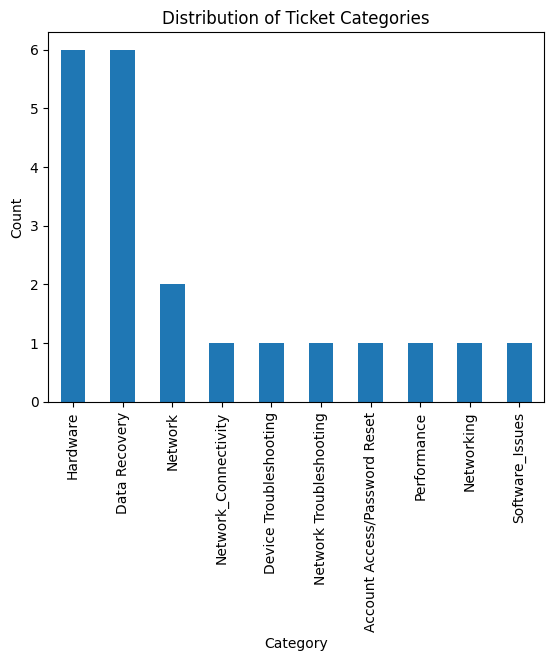

In [77]:
# Univariate analysis of 'Category' : Lets print bar plot
final_data_4['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Ticket Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Observations:

Hardware and Data recovery are among top two major issues reported.
Network issues are also faced oftnely.

###### Priority wise analysis

In [78]:
#Lets find unique values for priority
final_data["priority"].value_counts()

,priority
High,20
Medium,1


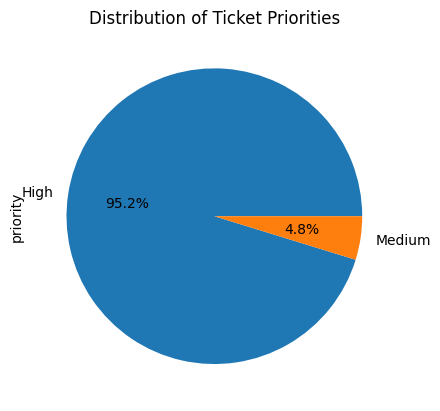

In [79]:
# Univariate analysis of 'priority'
final_data_4['priority'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Ticket Priorities')
plt.show()

Observations:

It is observed that most of the issues are critical with high priorities.
There is only one issue with medium priority, rest all are critical.

###### ETA wise analysis

In [80]:
final_data["ETA"].value_counts()

,ETA
1-2 business days,5
1-2 days,4
1-3 days,4
4 hours,3
1-3 business days,2
same day,1
1 hour,1
2-3 days,1


In [81]:
#Standardize ETA into days
final_data['ETA_days'] = final_data['ETA'].apply(eta_to_days)
final_data["ETA_days"].value_counts()

,ETA_days
1-2 days,9
1-3 days,6
< 1 day,5
2-3 days,1


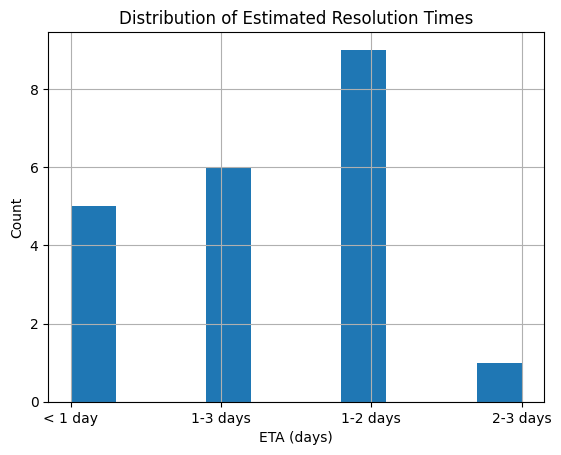

In [82]:
# Univariate analysis of 'ETA' - Assuming ETA is in a consistent format (e.g., hours)
# final_data_4['ETA'].str.extract('(\d+)').astype(float).hist()
final_data['ETA_days'].hist()
plt.title('Distribution of Estimated Resolution Times')
plt.xlabel('ETA (days)')
plt.ylabel('Count')
plt.show()

Observations:

There are more issues with ETA with 1-2 days.
Very few issues with ETA more than to 2 days.

###### Category wise ETA analysis

In [83]:
#Group by Category, ETA
final_data.groupby(['Category', 'ETA_days']).support_tick_id.count()

Category                       ETA_days
Account Access/Password Reset  < 1 day     1
Data Recovery                  1-3 days    6
Device Troubleshooting         1-2 days    1
Hardware                       1-2 days    4
                               2-3 days    1
                               < 1 day     1
Network                        < 1 day     2
Network Troubleshooting        1-2 days    1
Network_Connectivity           < 1 day     1
Networking                     1-2 days    1
Performance                    1-2 days    1
Software_Issues                1-2 days    1
Name: support_tick_id, dtype: int64

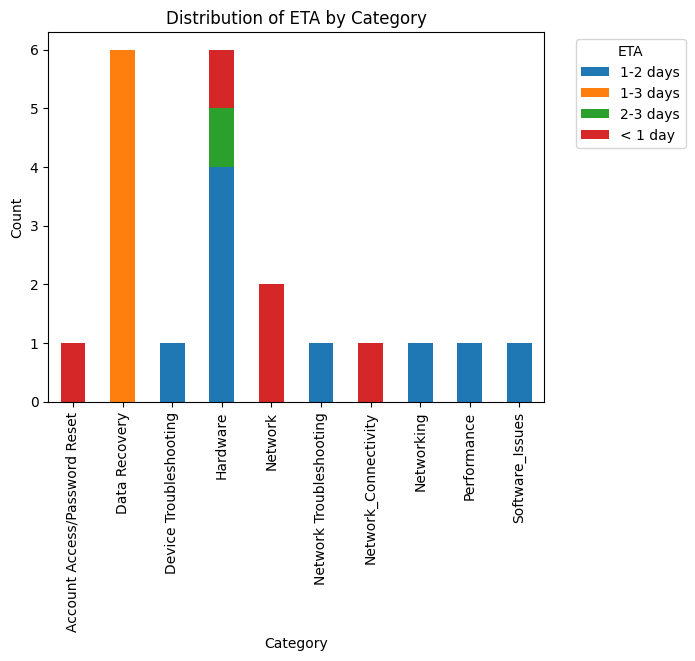

In [84]:
category_eta_counts = final_data.groupby(['Category', 'ETA_days']).support_tick_id.count().unstack()

category_eta_counts.plot(kind='bar', stacked=True)
plt.title('Distribution of ETA by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='ETA', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


Observations:

ETA for data recovery varies in 1-3 days.

Most of the hardware issues require 1-2days ETA. However few of them has less than 1 day ETA and few have more than 2 days ETA.

## Actionable Insights and Recommendations

**Actionable Insights:**

* High Frequency of Hardware and Data Recovery Issues:

  A significant number of support tickets (e.g., ST2023-007, ST2023-013, ST2023-017) are related to hardware issues, including laptop startup failures, blue screen errors, and black screen problems. Similarly, data recovery issues (e.g., ST2023-008, ST2023-014, ST2023-016) appear frequently, involving scenarios like accidental deletions, external hard drives not being recognized, and USB drive formatting errors.

  **Insight**: Hardware and data recovery issues are common pain points for customers, indicating potential weaknesses in product durability or user awareness of safe data handling practices.

* Urgent Issues Predominantly Assigned High Priority:

  Most tickets that are marked as "urgent" or critical, such as those involving account access (e.g., ST2023-011) or urgent hardware issues (e.g., ST2023-007, ST2023-013), are rightly assigned a high priority with a quick response time ranging from 2 hours to 24 hours.

  **Insight**: The prioritization of tickets appears to be well-aligned with the urgency of the issues, ensuring that critical customer concerns are addressed promptly.

* Network and Internet Issues Are Common:

  Tickets related to network issues (e.g., ST2023-009, ST2023-022, ST2023-025) are frequently encountered. Customers report problems like inconsistent Wi-Fi, slow speeds, and frequent disconnections.

  **Insight**: Network-related issues are prevalent, suggesting potential areas for service improvement, whether in providing more robust hardware or offering more detailed troubleshooting guides to customers.

* Recurring Problems with Peripherals and Accessories:

  Several tickets (e.g., ST2023-014, ST2023-020) highlight issues with peripherals such as external hard drives and laptop touchpads. These issues are often critical, leading to high priority support requests.

  **Insight**: Peripherals and accessories might be areas where quality or durability could be improved, or where customers might need more detailed user guides to prevent issues.

**Recommendations (For implementing NLP solution)**:

1. Assess the Volume and Complexity of Support Tickets
    - Evaluate the Ticket Load: Determine the daily, weekly, or monthly volume of support tickets. This helps in understanding the scale at which automation can be beneficial.
    - Categorize the Complexity: Identify the range of issues typically handled by support. If a large number of tickets are repetitive or fall into predictable categories, automation can save significant time.
2. Implement a Phased Rollout
    - Start with a Pilot Program: Begin by automating responses for specific categories of tickets, such as common issues like password resets or connectivity problems.
    - Monitor and Adjust: Track the performance of the automated system, focusing on accuracy, customer satisfaction, and response time. Adjust the model based on feedback.
3. Ensure Human Oversight
    - Human-in-the-Loop: For complex or sensitive issues, have a human agent review or approve the automated responses before they are sent to customers.
    - Fallback Mechanisms: In cases where the model's confidence is low, route the ticket to a human support agent rather than relying solely on the automated response.
4. Enhance Data Quality and Model Training
    - Continuous Learning: Use feedback loops to continually update and retrain the model based on new data. This helps the system adapt to emerging issues or changes in customer behavior.
    - Data Quality: Ensure the training data is comprehensive, well-labeled, and reflective of real-world scenarios. This improves the accuracy and reliability of the predictions.

**Recommendations (to reduce issues and improve quality)**:
1.   Enhanced Product Durability and Customer Education:

    Consider improving the durability of hardware components and providing customers with educational resources on how to avoid common issues (e.g., data recovery problems, hardware failures). This could reduce the volume of support tickets related to these recurring issues.

2.   Encourage users to use cloud storage for data

    High number of case for data recovery. Need deep dive to check what is causing issue. Further encourage users to keep data on cloud to avoid data loss even in case of device failures

3.   Keep centralized knowledge base for support agents and for end users
    Easy access to related help document will avoid issues and also will help to faster resolutions.

5.   Introduce More Personalized Customer Support:

    For high-priority or frequently recurring issues, enhance customer satisfaction by personalizing responses rather than relying solely on standardized templates. Tailoring responses based on the specific situation might improve the perceived quality of support.

6.   Proactive Monitoring and Troubleshooting Guides for Network Issues:

    Since network-related issues are common, implement proactive monitoring tools for customers or create more comprehensive troubleshooting guides to empower customers to resolve these issues more efficiently before needing to reach out for support.

7.   Regular Quality Checks and Updates for Peripherals:

    Conduct regular quality assessments on peripherals such as external hard drives and touchpads, and offer firmware updates or improved designs where necessary to prevent frequent failures.

8.   Prioritize and Expedite Responses for Urgent Issues:

    Maintain or even improve the quick response times for high-priority and urgent issues, ensuring that customers feel their most critical concerns are being addressed with the utmost urgency.

9.   Explore Automation in Support Processes:

    Given the high volume of similar issues, explore further automation in the categorization and initial response phases to expedite support processes and allocate human resources to more complex cases.
















#### Generating insights and recommendations using prompt & model for available ticket database (Experiment/Demostration)

In [85]:
#Function to truncate text till certain limit for given text
def truncate_text_simple(text, max_length):
    if len(text) > max_length:
        return text[:max_length] + "..."  # Adding ellipsis to indicate truncation
    return text

# Define the maximum number of characters for truncation
max_chars = 200

# Now, generate the merged text, truncating the support_ticket_text as needed
merged_text = (
    "Here are the combined details of all support tickets:\n\n" +
    final_data_3.apply(
        lambda row: (
            f"Ticket: '{truncate_text_simple(row['support_ticket_text'], max_chars)}'\n" #Pass ticket text values for merging
            # f"Category: '{row['Category']}'\n"
            # f"Tags: '{row['tags']}'\n"
            # f"Priority: '{row['priority']}'\n"
            # f"ETA: '{row['ETA']}'\n\n"
        ), axis=1
    ).str.cat(sep="\n")
)

# Create a prompt to generate recommendations for tickets
comprehensive_prompt = (
    f"{merged_text}"
    f"Based on the above information, please provide a set of some actionable insights and recommendations to improve the overall ticket resolution process, prioritize critical issues, and optimize resources. Limit it till 4 points only"
)

# Generate final recommendations
final_recommendations = GenerateModelResponse(comprehensive_prompt)

# Print the comprehensive prompt and final recommendations
print("\nAuto-generated recommendations:\n", final_recommendations)


Llama.generate: prefix-match hit



Auto-generated recommendations:
 1. Implement a ticketing system with clear priority levels: Establish a well-defined ticketing system that categorizes tickets based on their severity and impact on users. This will help in prioritizing critical issues and ensuring timely resolution.

2. Utilize automation for routine tasks: Automate repetitive tasks, such as data backups or software updates, to free up resources for more complex issues. This can significantly reduce the workload on support agents and improve overall efficiency.

3. Implement a knowledge base: Create and maintain an extensive knowledge base that covers common issues and their solutions. Provide users with easy access to this information through self-service portals or search functions. This will help reduce the number of tickets generated for simple queries, allowing support agents to focus on more complex cases.

4. Implement a proactive approach: Adopt a proactive approach by monitoring systems and identifying potent

## Final Summary :

It is very much possible to get desired output from LLM models if correct prompts are used. Our model performed well when used with effective Prompts.

- Precise and Concise: The model tends to perform better when prompts are clear and to the point. Unnecessary verbosity create issues. Conveying message with as few words as possible helped.

- Include All Expectations: Essential to include all expectations and requirements in the prompt. The more detailed and specific about what is needed, the better the model can tailor its responses.

- Use Clear Instructions: Provide straightforward instructions and avoid ambiguity. Clear instructions help the model understand request better and generate more accurate responses.

- Provide Context: It is necessary to give relevant background information or context to help the model understand the scenario. This improved the quality and relevance of the responses.

- Specify the Format: Specifying preferred format for the response in the prompt helped. Whether we need a list, a summary, or a detailed explanation, specifying the format can guide the model's output.

- Ensure to avoid repeatation so that cyclic response wont be generated